In [102]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ml libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
# import the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [104]:
X = df.drop('species',axis=1)
y = df['species']

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
# call the model
model = SVC(kernel='poly') # we can change kernel and use ( linear,rbf, poly,sigmoid,precomputed )
# train the model
model.fit(X_train,y_train)

# predict the model
y_pred = model.predict(X_test)

In [107]:
# evaluate the model

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.91      0.91      0.91        11
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [108]:
print(confusion_matrix(y_test,y_pred))

[[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]


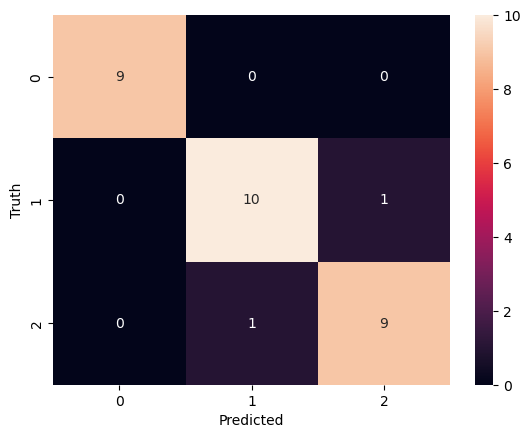

In [109]:
# draw the confusion matrix using heatmap

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Confusion Matrix (Iris dataset using SVC)

The following confusion matrix shows the performance of a Support Vector Classifier (SVC) on the Iris dataset:

| Truth \ Predicted | 0 | 1 | 2 |
|-------------------|---|---|---|
| **0 (Setosa)**    | 9 | 0 | 0 |
| **1 (Versicolor)**| 0 | 10 | 1 |
| **2 (Virginica)** | 0 | 1  | 9 |

---

#### Insights:
- **Class 0 (Setosa):** 9/9 correctly classified → Perfect classification ✅  
- **Class 1 (Versicolor):** 10/11 correct, 1 misclassified as Virginica  
- **Class 2 (Virginica):** 9/10 correct, 1 misclassified as Versicolor  

---

#### Conclusion:
- The classifier performs very well with **2 misclassifications in total**.  
- Most errors occur between **Versicolor** and **Virginica**, which are often harder to separate.  


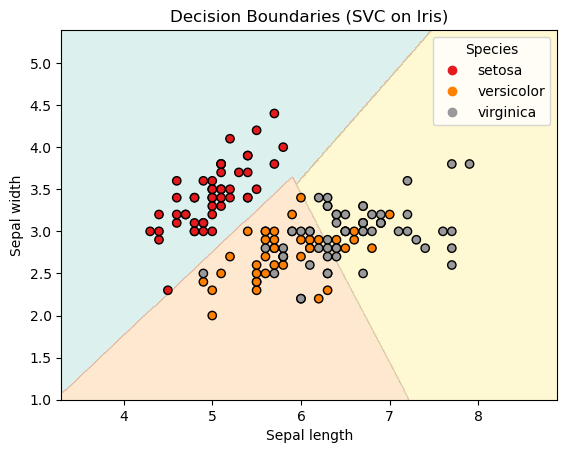

In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

# Load dataset
df = sns.load_dataset('iris')
X = df.drop('species', axis=1).values   # features as numpy array
y = df['species']

# Encode species to numeric
y_num, y_labels = pd.factorize(y)

# Train SVC (sirf 2D features for plotting)
model = SVC(kernel='linear')
model.fit(X[:, :2], y_num)

# Meshgrid for background
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary + points
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set3")
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_num, edgecolors="k", cmap="Set1")

# Add legend with species names
handles, _ = scatter.legend_elements()
plt.legend(handles, y_labels, title="Species")

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Decision Boundaries (SVC on Iris)")
plt.show()


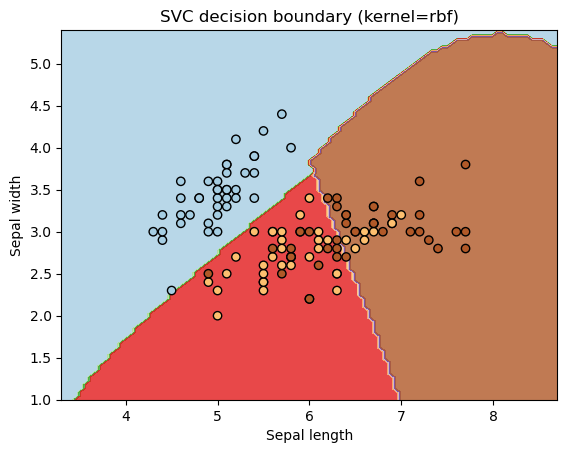

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# prepare data (use only first 2 features for plotting)
X = df[['sepal_length','sepal_width']].to_numpy()
y = pd.factorize(df['species'])[0]   # numeric labels 0/1/2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc = SVC(kernel='rbf').fit(X_train, y_train)

# decision surface (one line that builds the grid + contour)
DecisionBoundaryDisplay.from_estimator(svc, X_train, response_method="predict",
                                      cmap=plt.cm.Paired, alpha=0.8)

# data points + legend
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel("Sepal length"); plt.ylabel("Sepal width")
plt.title(f"SVC decision boundary (kernel={svc.kernel})")
plt.show()
